In [1]:
import sys
import stylishplot
import empymod
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt

import emulatte as emu
from emulatte.source import *
from emulatte.halfspace import analytical

In [2]:
def fdem_plot(freq, data, data2=None):
    fc = "#fff"
    tc = "#555"
    fig = plt.figure(figsize=(6,4), facecolor=fc, dpi=200)
    ax = fig.add_subplot(111)
    cc = ["#5bf", "#06a", "#fb5", "#b36"]

    ax.loglog(freq, data.real, c=cc[0], linestyle="-")
    ax.loglog(freq, -data.real, c=cc[0], linestyle=":")
    ax.loglog(freq, data.imag, c=cc[1], linestyle="-")
    ax.loglog(freq, -data.imag, c=cc[1], linestyle=":")

    if not data2 is None:
        ax.loglog(freq, data2.real, c=cc[2], linestyle="--")
        ax.loglog(freq, -data2.real, c=cc[2], linestyle=":")
        ax.loglog(freq, data2.imag, c=cc[3], linestyle="--")
        ax.loglog(freq, -data2.imag, c=cc[3], linestyle=":")

    ax.set_xlim(freq.min(), freq.max())
    #ax.set_ylim(ylim_min, ylim_max)

    ax.set_facecolor(fc)

    ax.grid(which="major", color="#ccc", linewidth=0.5)
    ax.grid(which="minor", color="#eee", linestyle="--", linewidth=0.5)

    # 枠の色
    ax.spines['left'].set_color(tc)
    ax.spines['bottom'].set_color(tc)
    # ラベルの色
    ax.xaxis.label.set_color(tc)
    ax.yaxis.label.set_color(tc)
    # 目盛りの色
    ax.tick_params(axis='x', colors=tc)
    ax.tick_params(axis='y', colors=tc)
    return fig

# VMD

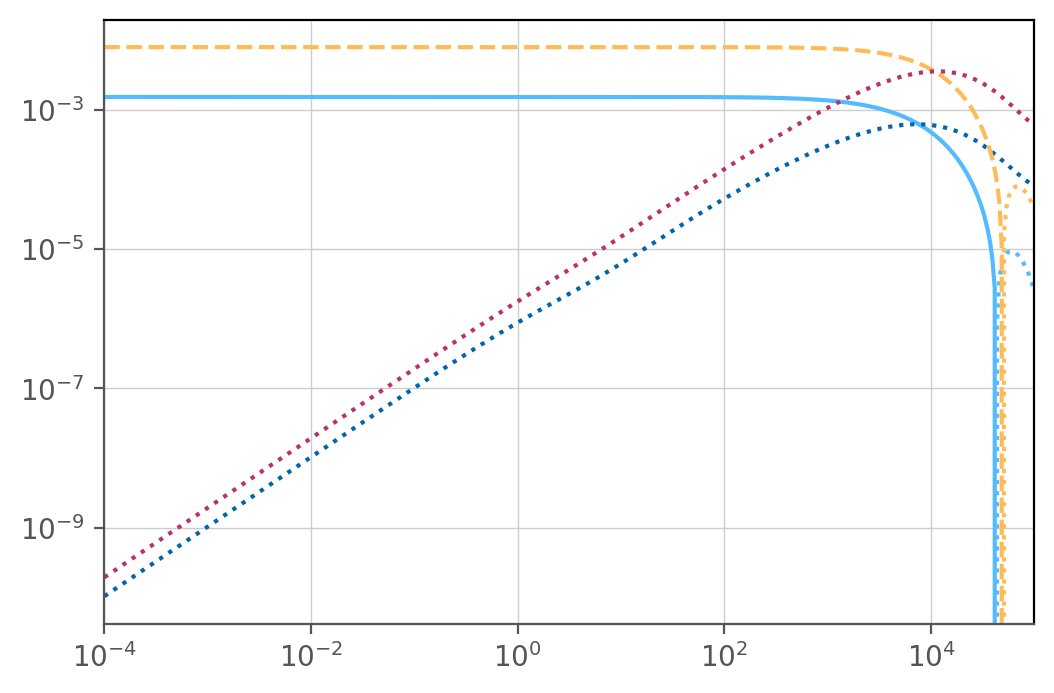

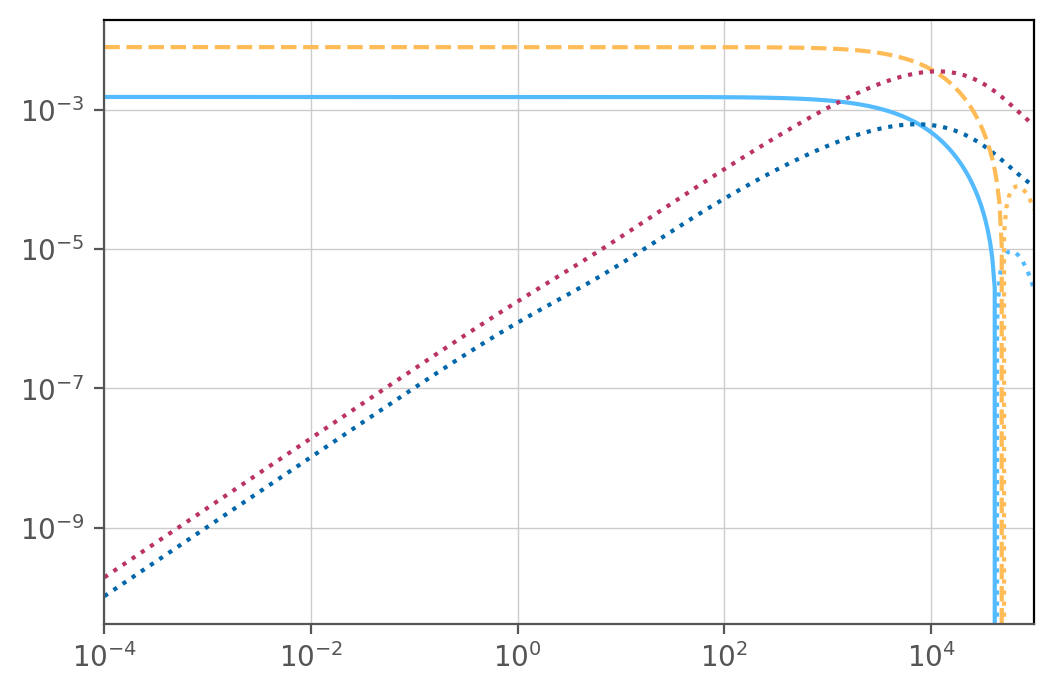

In [13]:
thick = [1000, 100]
res = [100, 1, 100]
freq = np.logspace(-4,5,400)
length = 10 * 2 ** 0.5
sz = 0
rz = 0
ry = 100
src = [[-500, 0, sz], [500, 0, sz]]
rec = [0, ry, rz]
EH = "H"
xyz = "z"

s = GroundedWire(1)
model = emu.create_model(thick)
model.set_params(res)
#model.set_params_air(1e9, 1, 1)
model.set_source(s, src)
model.change_dlf_filter(hankel_dlf="anderson_801")
em_gw = model.fdem(EH, xyz, rec, freq)

s = HED(1, 1000, 0)
src = [0, 0, sz]
model = emu.create_model(thick)
model.set_params(res)
#model.set_params_air(1e9, 1, 1)
model.set_source(s, src)
#model.change_dlf_filter(hankel_dlf="werthmuller_201")
em_ed = model.fdem(EH, xyz, rec, freq)

src = [-500, 500, 0, 0, 0, 0]
rec = [0, ry, 0, 0, 90]
# Hx: [0, 1000, 0, 0, 0]
# Hy: [0, 1000, 0, 90, 0]
# Hz: [0, 1000, 0, 0, 90]
depth = [0,1000,1100]
res = [1e12, 100, 1, 100]
strength = 1
mrec = True
ft = 'dlf'
ht = 'dlf'
srcpts = 1


# Computation
inp = {'src': src, 'rec': rec, 'depth': depth, 'res': res,
       'freqtime': freq, 'strength': strength, 'mrec': mrec,
       'verb': 1, 'ft': ft, 'ht': ht, 'epermH': [0, 0, 0, 0]}
#frequency-domain: {'freqtime': freq}
#time-domain: {'freqtime': time}

fhz_num = empymod.bipole(signal=None, **inp)
#time: (signal=-1)
#frequency: (signal=None)

fig = fdem_plot(freq, em_gw, em_ed)
fig = fdem_plot(freq, em_gw, fhz_num)

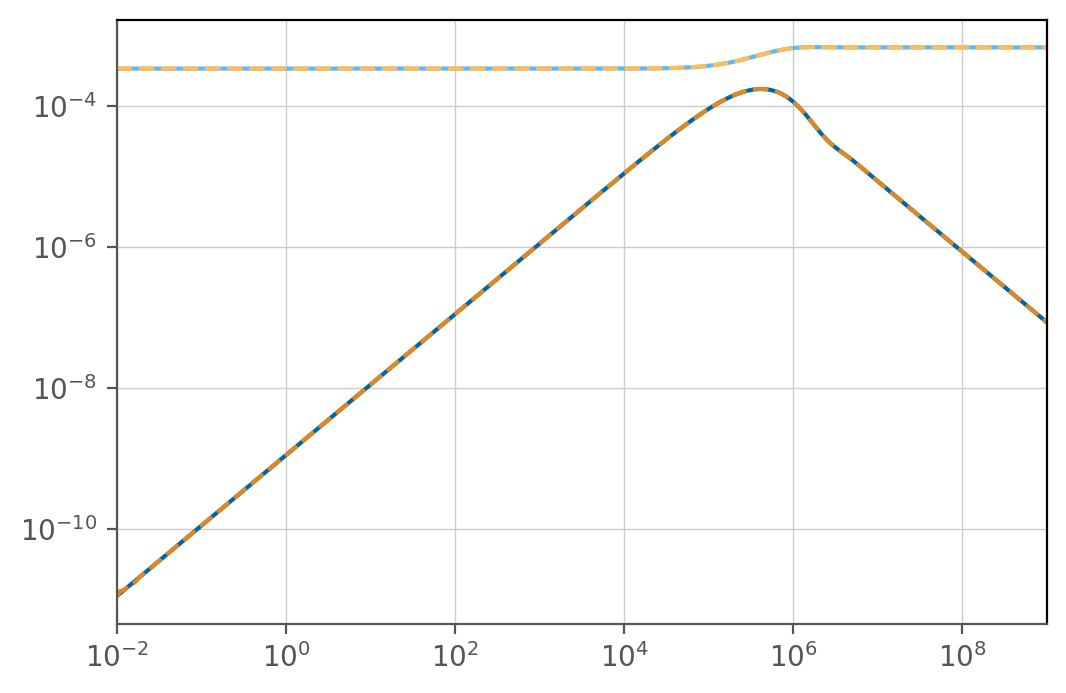

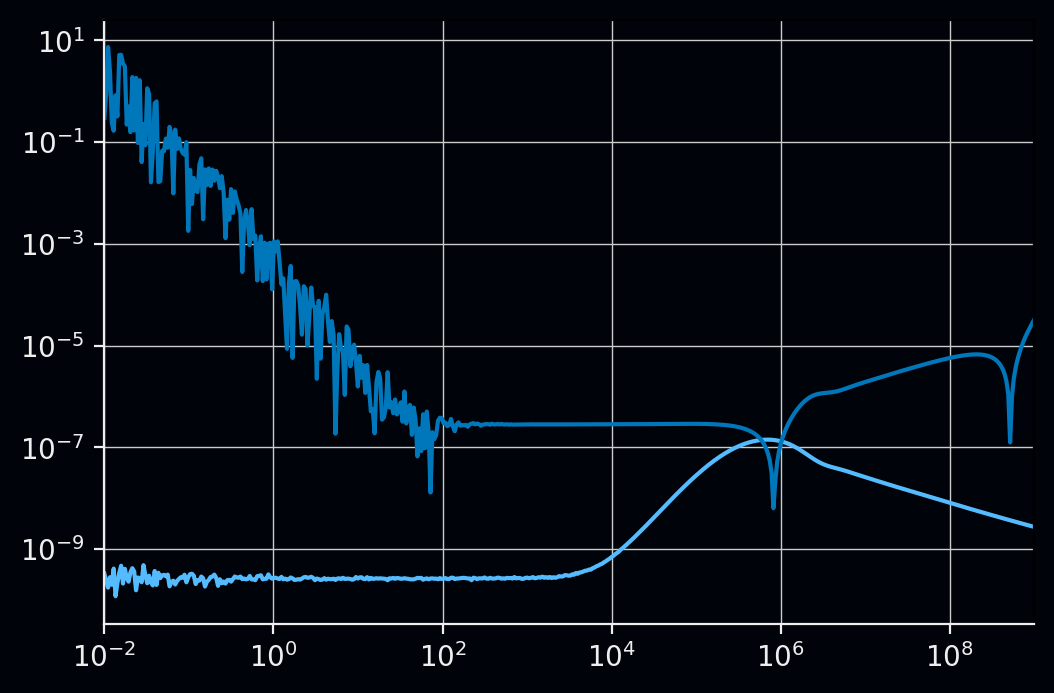

In [4]:
thick = []
res = [10]
freq = np.logspace(-2, 9, 500)
src = [0, 0, 0]
rec = [5, 5, 0]

vmd = HMD(1, 0)
model = emu.create_model(thick, )
model.set_params(res)
model.set_params_air(1e15, 1, 1)
model.set_source(vmd, src)
model.change_dlf_filter("werthmuller_201")
hz = model.fdem("H", "y", rec, freq)

hz_ideal = analytical.SurfaceHMDx(res[0], rec[:2]).fdem_hy(freq)

fig = stylishplot.fdem_plot(freq, hz, hz_ideal)
plt.show()

fig = stylishplot.fdem_rel_error_plot(freq, hz, hz_ideal)
plt.show()

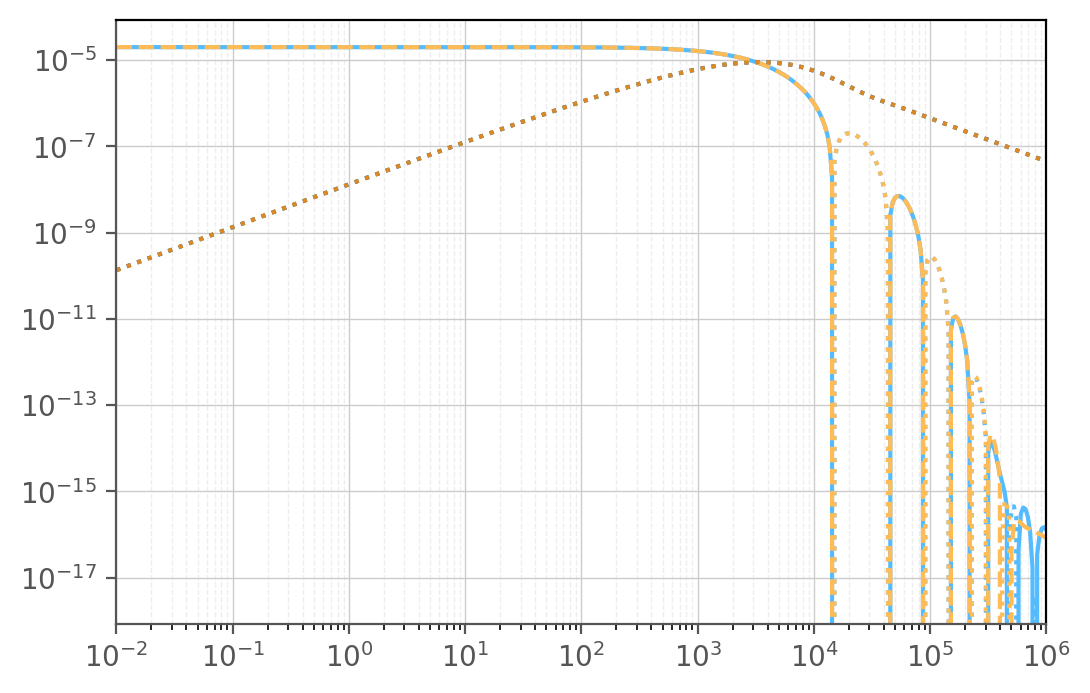

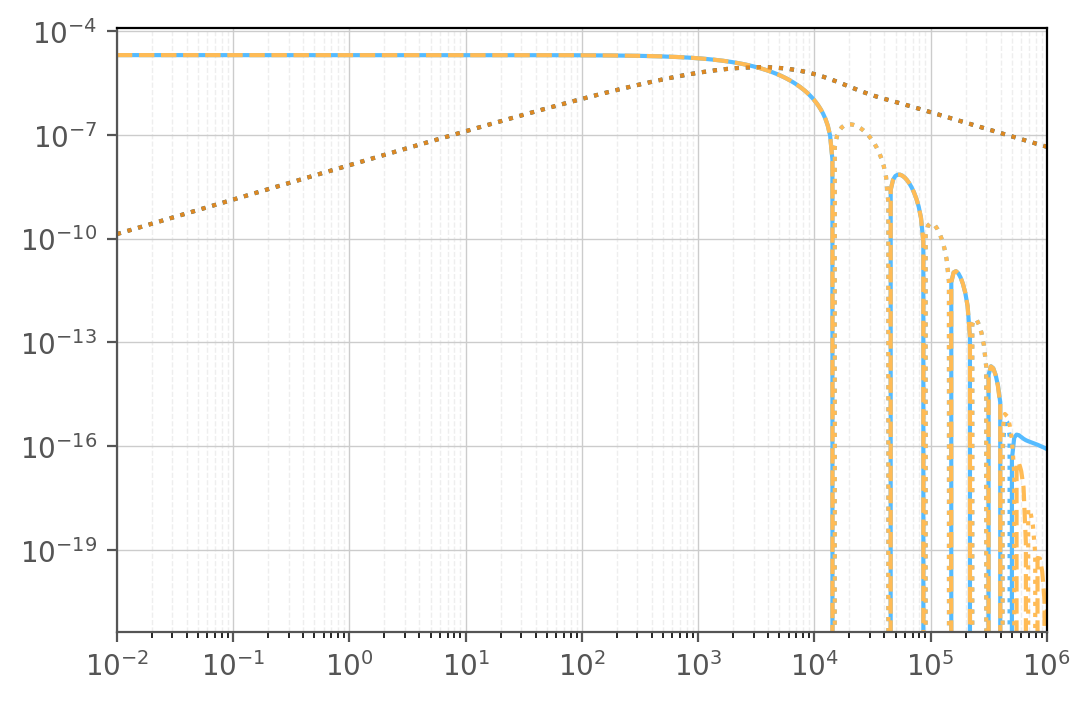

In [8]:
thick = []
res = [10]
freq = np.logspace(-2,6,400)
length = 1
src = [[-length/2, 0, 0], [length/2, 0, 0]]
rec = [30, 50, 0]
EH = "H"
xyz = "z"

s = GroundedWire(1)
model = emu.create_model(thick)
model.set_params(res)
#model.set_params_air(1e20,1,1)
model.set_source(s, src)
model.change_dlf_filter(hankel_dlf="anderson_801")
em_gw = model.fdem(EH, xyz, rec, freq)

s = AED(1, length, 0, 0)
src = [0, 0, 0]
model = emu.create_model(thick)
model.set_params(res)
model.set_params
model.set_source(s, src)
model.change_dlf_filter(hankel_dlf="werthmuller_201")
em_ed = model.fdem(EH, xyz, rec, freq)

em_an = analytical.SurfaceHEDx(res[0], rec[:2], length).fdem_hz(freq)

fig = stylishplot.fdem_plot(freq, em_gw, em_ed)

fig = stylishplot.fdem_plot(freq, em_ed, em_an)

In [6]:
30 / (30 ** 2 + 50 ** 2)** 0.5

0.5144957554275266

In [7]:
start_time = time.perf_counter()
thick = [1000, 100]
res = [100, 1, 100]
freq = np.logspace(-2,5,400)
src = [[-500, 0, 0.01], [500, 0, 0.01]]
rec = [0, 1000, 0]
EH = "H"
xyz = "y"

vmd = GroundedWire(1, 1)
model = emu.create_model(thick)
model.set_params(res)
model.set_source(vmd, src)
model.change_dlf_filter(hankel_dlf="anderson_801")
em_gw = model.fdem(EH, xyz, rec, freq)

end_time = time.perf_counter()
elapsed_time = end_time - start_time

NameError: name 'time' is not defined

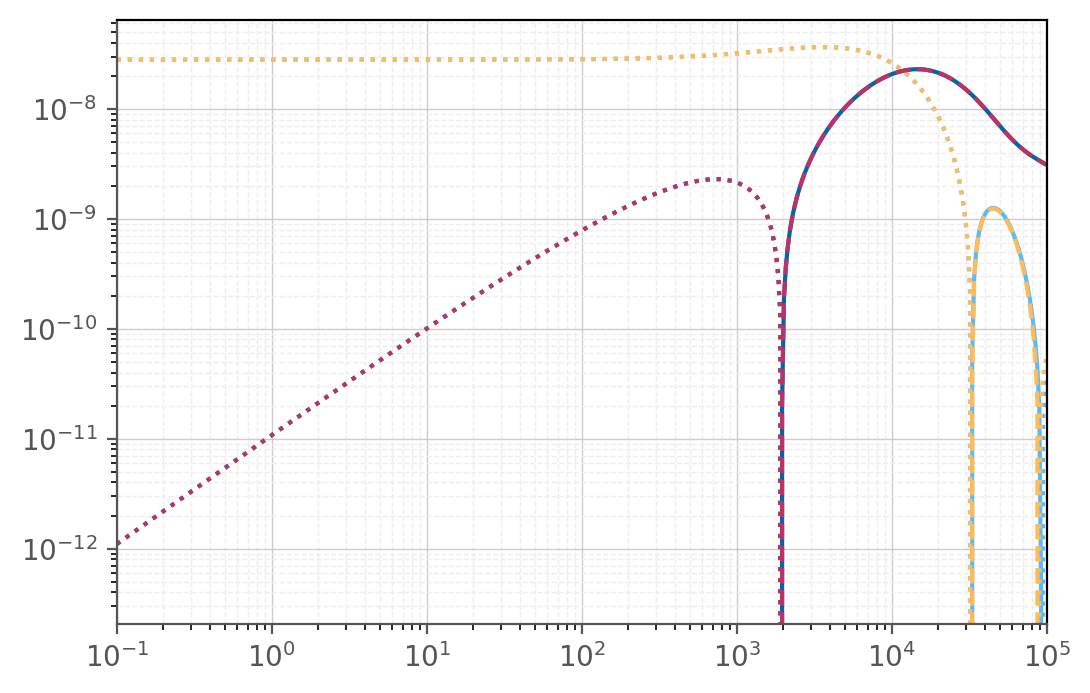

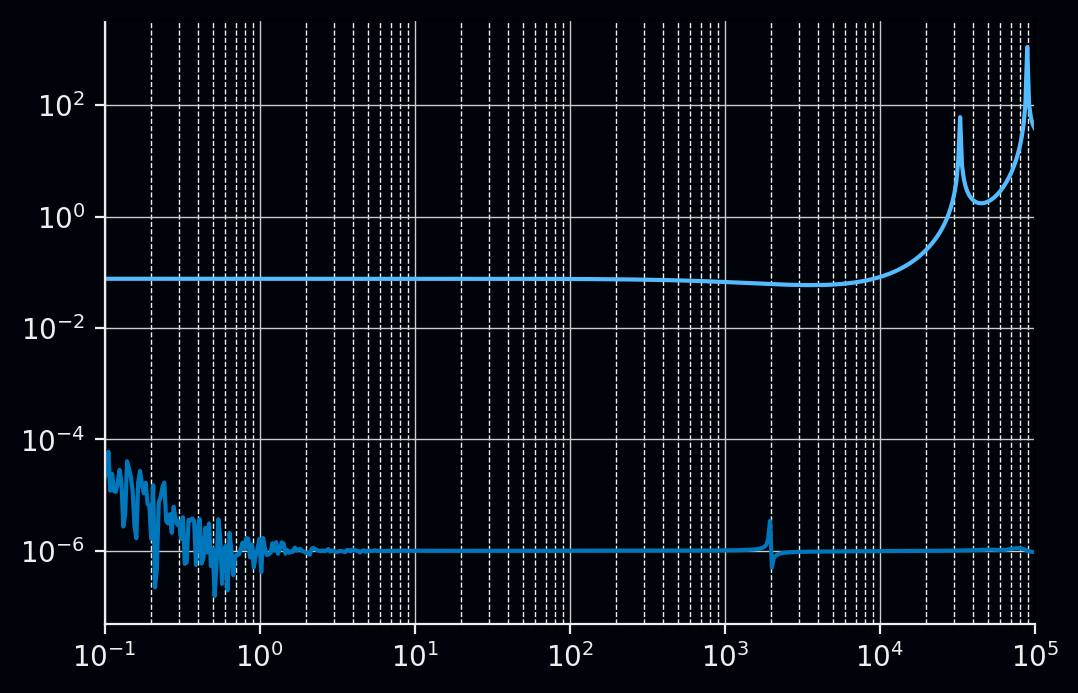

In [ ]:
thick = []
res = [100]
freq = np.logspace(-1, 5, 500)
src = [0, 0, 0]
rec = [100, 100, 0]

vmd = VMD(1)
model = emu.create_model(thick)
model.set_params(res)
model.set_source(vmd, src)
hz = model.fdem("H", "z", rec, freq)

hz_ideal = analytical.SurfaceVMD(res[0], rec[:2]).fdem_hz(freq)

fig = stylishplot.fdem_plot(freq, hz, hz_ideal)
plt.show()

fig = stylishplot.fdem_rel_error_plot(freq, hz, hz_ideal)
plt.show()


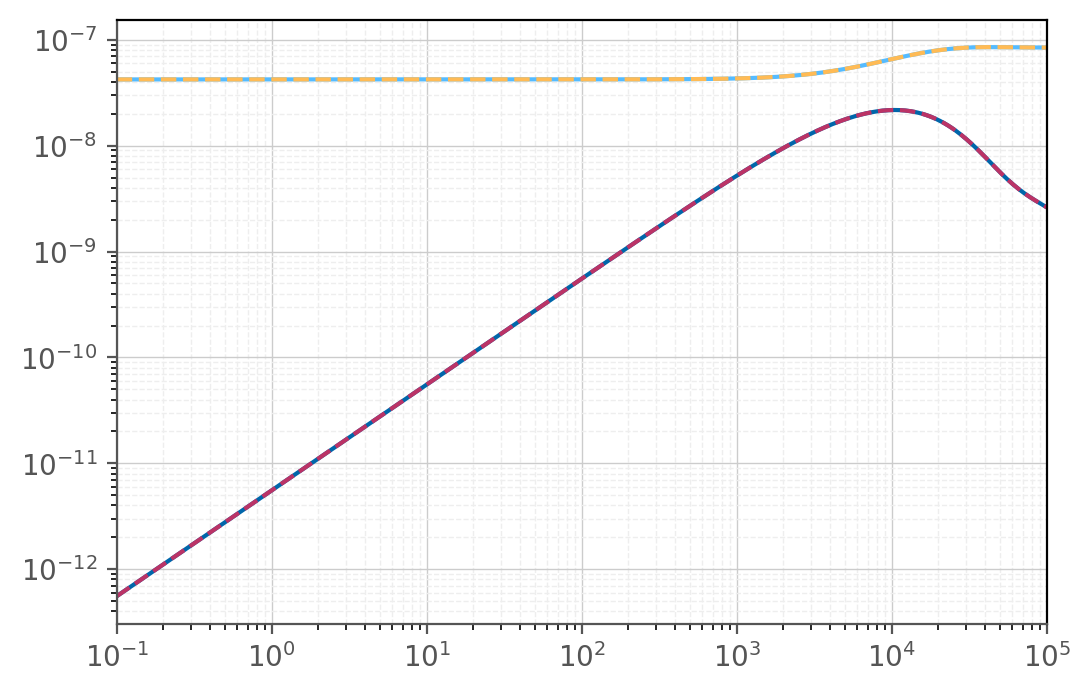

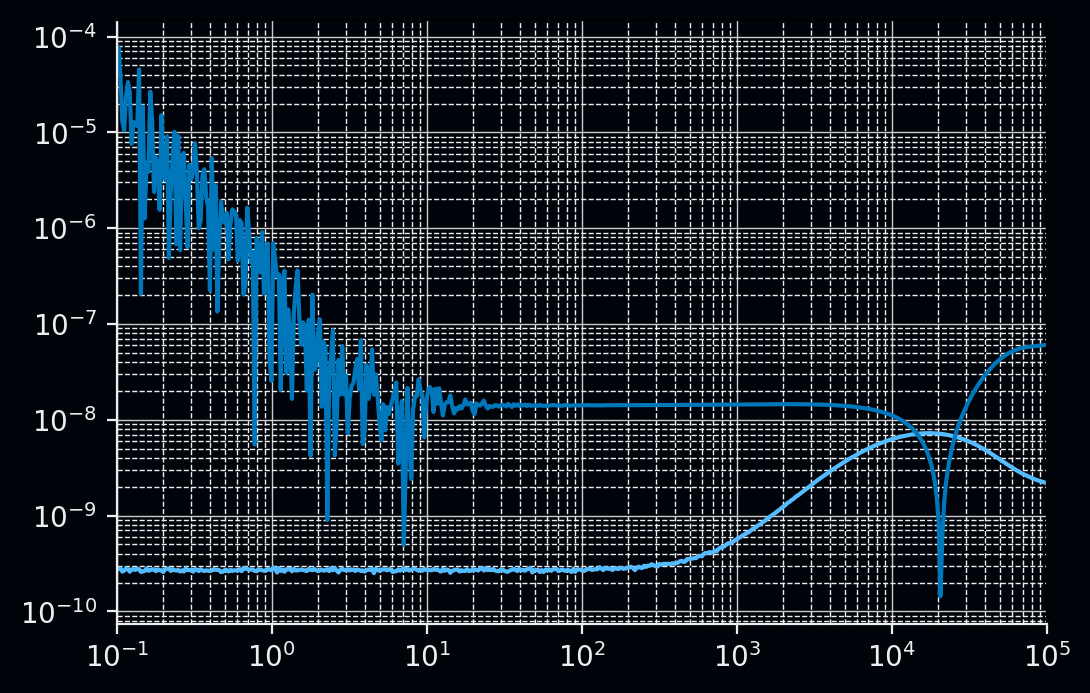

In [ ]:
thick = []
res = [100]
freq = np.logspace(-1, 5, 500)
src = [0, 0, 0]
rec = [100, 100, 0]

vmd = HMD(1, 0)
model = emu.create_model(thick)
model.set_params(res)
model.set_params_air(1e20, 1, 1)
model.set_source(vmd, src)
model.change_dlf_filter("werthmuller_201")
hz = model.fdem("H", "y", rec, freq)

hz_ideal = analytical.SurfaceHMDx(res[0], rec[:2]).fdem_hy(freq)

fig = stylishplot.fdem_plot(freq, hz, hz_ideal)
plt.show()

fig = stylishplot.fdem_rel_error_plot(freq, hz, hz_ideal)
plt.show()